# Data science for Machine Learning: lecture 2
## Topics from data science and data mining used in ML

Mehrdad Yazdani <br>
@crude2refined

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import display, HTML, Image

%matplotlib inline

# Overview


- Linear Regression
    - Ordinary Least Squares
    - Ridge Regression
    - Model evaluation and testing
  

- Model evaluation and testing
   - Training and test set set
   - Cross validation 
   - Performance metrics

<img src="./imgs/lecture-2/linear-regression.png">

## Supervised vs. unsupervised learning

- Supervised learning:
    - Decision making
    - Estimation, prediction
    - Classification
    - Outlier detection 


- Unsupervised learning:
    - Summarization
    - Compression
    - Clustering
    - Template matching
    - Outlier detection or density estimation 
   
   
- Always ask: what type of problem are you trying to solve? 

- It is not unusual to use a combination of both methods to solve a specific problem.

# Classification vs Regression 

- Classification: when the "decision" we want to make is of categories 
    - Does a patient have cancer?
    - Should a loan be given or not?
    - Is this email spam or not?
    
    
- Regression: when the "decision" we want to make is a continuous variable   
    - How much is this house worth?
    - How risky is this loan?
    - What is this person's BMI?

# Classification vs Regression

<img src="./imgs/Lecture-1/ML-pipe.png">

- Can think of supervised learning as learning a "black box" that transforms the input to a desired output
- Regression: the output $y \in \mathbb{R}$
    - Usually can be generalized easily to multiple outputs $y \in \mathbb{R}^{m}$
- Classification: the output is one of $m$ categories $y \in \{0, 1, \ldots, m -1\}$ 


- We can think of characterizing this black box as a function $f(x)$ that maps inputs from $x \in \mathbb{R}^{n}$ to outputs $y$ 

# Supervised learning pipeline: prepare, learn, and evaluate

1. **Prepare** a dataset with lots of input and output examples: $\{(x_{i}, y_{i}) : i = 1, \ldots, N\}$. A large potion of this step may be preparing the data so that $x_i \in \mathbb{R}^n$.
2. **Learn** a model (that is, a function) that maps inputs $x$ to the outputs $y$. In other words, find  a function $f(\cdot)$ based on the the input $x_i$ and output $y_i$ example pairs that you have so that $f(x) \rightarrow y$. Learning is typically done as an optimization function that minimizes a loss function. 
3. **Evaluate**how accurate the model $f(x)$ is for *future* or unseen data


- How do we get *future* data?

# Linear regression

- For inputs $x\in \mathbb{R}^n$ and outputs $y \in \mathbb{R}$, collect data set $\{(x_{i}, y_{i}) : i = 1, \ldots, N\}$
- Assume that the functional relationship between the input and output is linear. 
- So $y = f_{\textbf{w}}(x)$ 
- Find $w_0, w_1, \ldots, w_n$, such that



$$ \textbf{y} \approx \textbf{X}\textbf{w}$$

where

$$
\textbf{y} \triangleq \begin{bmatrix} y_1\\ y_2 \\ \vdots \\ y_N \end{bmatrix}, 
\qquad 
\textbf{X} = \begin{bmatrix} 1 & x_{1}^{T} \\ 1 & x_{2}^{T}\\ \vdots & \vdots \\ 1 & x_{N}^{T} \end{bmatrix},
\qquad
\textbf{w} = \begin{bmatrix} w_0\\ w_1 \\ \vdots \\ y_n \end{bmatrix}, 
$$


<br>
- Define The residuals $r_i = | y_i -  f_{\textbf{w}}(x_i)|$ for all $i = 1, \ldots, N$


- How do we find $\textbf{w} \in \mathbb{R}^{n+1}$ so that that  $\textbf{X}\textbf{w}$ is really "close" to $\textbf{y}$?. 


- Put another way, how can we find $w$ so that the residuals $r_i$  are small for all $i = 1, \ldots, N$

# Ordinary Least Squares (OLS)

$r_i(\textbf{w})) = | y_i -  f_{\textbf{w}}(x_i)|$

- In OLS, we want to find a $\textbf{w}$ so that the sum of the squared residuals is as small as possible

$$\underset{\textbf{w}}{\text{argmin}} \sum_{i=1}^{N} r_{i}^{2}(\textbf{w})$$


- It turns out that selecting this loss function is the “optimal” one in the case that the uncertainty is modeling IID 
Gaussian


- We can analytically solve this by expressing the OLS objective function as


$$\underset{\textbf{w}}{\text{argmin}} \sum_{i=1}^{N} r_{i}^{2}(\textbf{w}) = \underset{\textbf{w}}{\text{argmin}} ||\textbf{y} - \textbf{Xw}||_{2}^{2}$$


$\frac{\partial}{\partial \textbf{w}} (\textbf{y} - \textbf{Xw})^{T}(\textbf{y} - \textbf{Xw})$


- Solving for the stationary point (setting the first derivative of the loss function to zero) yields the **normal equations**:

$$\textbf{X}^{T}\textbf{Xw} = \textbf{X}^{T}\textbf{y}$$

# Solving the normal equations

- To find the optimal solution, we need to find $\textbf{w}$ that satisfies the normal equations:

$$\textbf{X}^{T}\textbf{Xw} = \textbf{X}^{T}\textbf{y}$$




- If the inverse of $\textbf{X}^{T}\textbf{X}$ exists, then we have

$$\textbf{w} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\textbf{y}$$

- If the inverse of $\textbf{X}^{T}\textbf{X}$ does *not* exist, then we can use the psuedo-inverse:

$$\textbf{w}= (\textbf{X}^{T}\textbf{X})^{+}\textbf{X}^{T}\textbf{y}$$

- Geometrically, the psuedo-inverse solution is the orthogonal projection of the target vector $\textbf{y}$ in the column space (also known as range space) of $\textbf{X}$.

In [2]:
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

# #############################################################################
# Data creation and setup
np.random.seed(999)
n = 50 # total number of data points
x = np.linspace(start = -3, stop = 3, num = n)
y_orig = .3 + 1*x 
## Add white noise
y =  y_orig + np.random.randn(n)

# #############################################################################
# Fit LinearRegression model
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_ = lr.predict(x[:, np.newaxis])




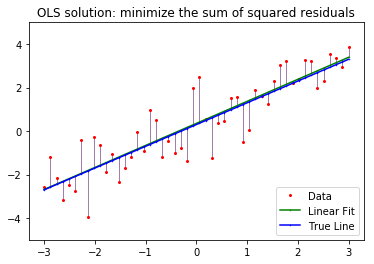

In [3]:
segments = [[[x[i], y[i]], [x[i], y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=4)
plt.plot(x, y_, 'g.-', markersize=1)
plt.plot(x, y_orig, 'b.-', markersize=1)
plt.ylim(-5,5)
plt.gca().add_collection(lc)
plt.legend(('Data', 'Linear Fit', 'True Line'), loc='lower right')
plt.title('OLS solution: minimize the sum of squared residuals');

In [4]:
# #############################################################################
# Data creation and setup
np.random.seed(999)
n = 50 # total number of data points
x = np.linspace(start = -3, stop = 3, num = n)
y_orig = .3 + 1*x 
## Add t-distributed (heavy tailed noise)
y =  y_orig + np.random.standard_t(df = 2, size = n)

# #############################################################################
# Fit LinearRegression model
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)
y_t = lr.predict(x[:, np.newaxis])



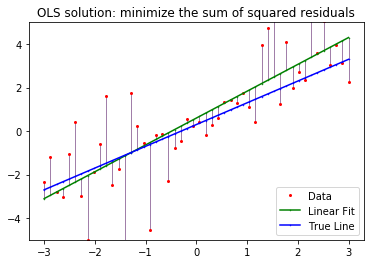

In [5]:
segments = [[[x[i], y[i]], [x[i], y_t[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=4)
plt.plot(x, y_t, 'g.-', markersize=1)
plt.plot(x, y_orig, 'b.-', markersize=1)
plt.ylim(-5,5)
plt.gca().add_collection(lc)
plt.legend(('Data', 'Linear Fit', 'True Line'), loc='lower right')
plt.title('OLS solution: minimize the sum of squared residuals');

In [6]:
t = np.linspace(-20, 20)

def huber_loss(t, c=3):
    return ((abs(t) < c) * 0.5 * t ** 2
            + (abs(t) >= c) * -c * (0.5 * c - abs(t)))

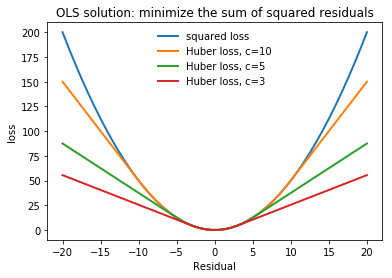

In [7]:
plt.plot(t, 0.5 * t ** 2, label="squared loss", lw=2)
for c in (10, 5, 3):
    plt.plot(t, huber_loss(t, c), label="Huber loss, c={0}".format(c), lw=2)
plt.ylabel('loss')
plt.xlabel('Residual')
plt.title('OLS solution: minimize the sum of squared residuals');
plt.legend(loc='best', frameon=False);

In [8]:
from sklearn.linear_model import HuberRegressor
# #############################################################################
# Fit LinearRegression model
np.random.seed(999)
lr = HuberRegressor(fit_intercept=True, alpha=0.0, max_iter=100, epsilon=1.1)
lr.fit(x[:, np.newaxis], y)
y_h = lr.predict(x[:, np.newaxis])

segments = [[[x[i], y[i]], [x[i], y_t[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(0.5 * np.ones(n))


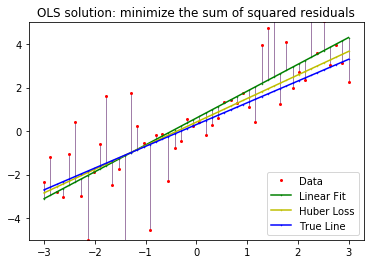

In [9]:
fig = plt.figure()
plt.plot(x, y, 'r.', markersize=4)
plt.plot(x, y_t, 'g.-', markersize=1)
plt.plot(x, y_h, 'y.-', markersize=1)
plt.plot(x, y_orig, 'b.-', markersize=1)
plt.ylim(-5,5)
plt.gca().add_collection(lc)
plt.legend(('Data', 'Linear Fit', 'Huber Loss', 'True Line'), loc='lower right')
plt.title('OLS solution: minimize the sum of squared residuals');

In [10]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss


xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2

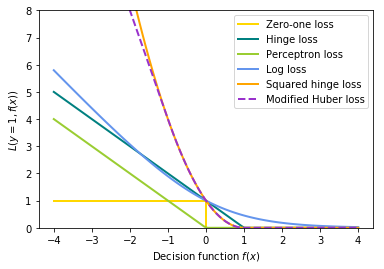

In [11]:

plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color='teal', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color='orange', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$");

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

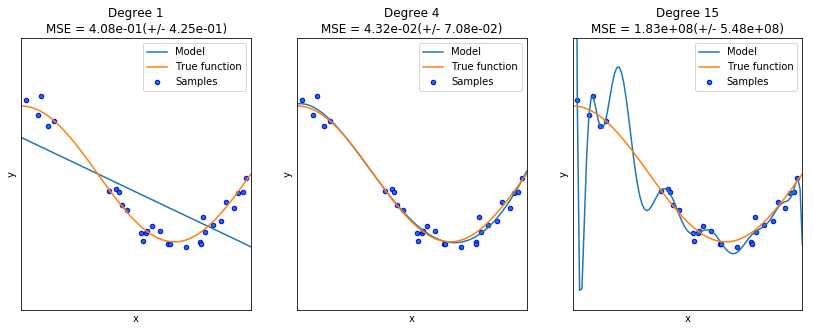

In [13]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

# Uncertainty with modelling

$$y = f(x) + \epsilon$$

Two sources of uncertainty:

- Did we pick the right model?
    - Model does not have nonlinearity
    - Did not collect the right features


- Is the data that we collected noisy? 
    - Features are noisy
    - Labels are noisy


# Anscombe's Quartet: what are sources of uncertainty? 

<img src="./imgs/lecture-2/anscombe.jpg">

<img src="./imgs/lecture-2/AllDinosGrey_1.png">

# Simpson's Paradox: the influence of confounding variables

<img src="./imgs/lecture-2/admissions.png">



<img src="./imgs/lecture-2/admissions-department.png">

# What are the sources of error?
<br>


$$y = f(x) + \epsilon$$

$$y \approx \widehat{f}(x)$$

- What are the sources of error in our approximation? 

$$
\begin{align*}
E[(y-\widehat{f})^2] &= \text{Var}[y] + \text{Var}[\widehat{f}] + E^{2}[(f-\widehat{f})]\\
&= \sigma^{2} + \text{Var}[\widehat{f}] + \text{Bias}[\widehat{f}]
\end{align*}
$$

# A hack solution to get unseen data

- Split the data set randomly into 3 sets: training set, validation set, test set
- Use the training and validation sets to build the model $f(x)$
- Use the test set as a proxy for "future" or unseen data to test and measure the performance of $f(x)$
    - Sometimes the training and validation sets are merged so we really have just two sets: training and test sets
- There is no guarantee that the test set represents future data!

<img src="./imgs/Lecture-1/train-val-test.png">

# k-fold cross validation

- Some may be skeptical that a single split is not robust enough to capture all the variations that we may get in unseen data. 
- k-fold cross validation is a common method for testing capturing the variability of unseen data
- Instead of relying on a single test set, we repeat the experiment k-times and are able to get performance bounds

<img src="./imgs/Lecture-1/5-fold.png">

- We often perform *stratified* k-fold: we want each fold to have a similar distribution of targets as the original dataset

<img src="./imgs/lecture-2/bias-and-variance.jpg">

<img src="./imgs/lecture-2/model-complexity.png">

In [14]:
%%time 
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



CPU times: user 27.5 s, sys: 28 ms, total: 27.5 s
Wall time: 27.5 s


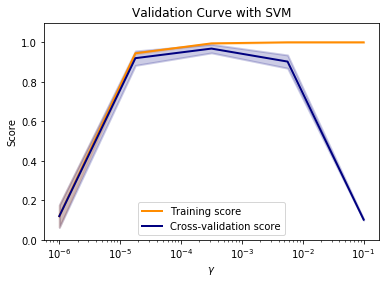

In [15]:

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best");

# Data preparation 

- Data cleaning:
    - Outliers
    - Missing values
    - Data scale (should data be strictly positive? does negative mean something different?)


- Data embedding:
    - How do we encode non-numeric data into a vector embedding?
        - one-hot-encoding 

# Why we need to prepare data

- Our ideal goal is to have structured data 
    - *m* rows: samples, instances, records, etc.
    - *n* columns: variables, features, fields, etc.


- Can be non-trivial; domain knowledge can help


- Data is often messy and inconsistent
    - negative age, invalid zip code, missing data, duplicated data 


# Missing data

<img src="./imgs/lecture-2/missing-data.png">

# Indicators of missing data

- Missing data can be encoded in one of several ways:
    - Blank character, 
    - NA: “Not available”
    - NaN: “Not a number”
    - “0”?, “-1”?, “inf”?, etc. 
    
    

- Hopefully coding of missing data has been consistent!


# How do we deal with missing values?

- Remove them
    - If you have lots of data and “few” missing values, easy and good method!

- “Impute” them: replace them with something

- Leave them if the ML algorithm is robust against them
    - For examples, Decision Trees and Random Forests


# Impute missing values with special values


- Replace with value that is completely different from typical range of variable
    - For example, “-1” if all non-missing values are positive
    - This way, hopefully the ML algorithm will learn to treat these missing values as special and differently

- This method is especially useful for cases where presence of a missing value can be very predictive


# Impute with mean or median

<img src="./imgs/lecture-2/mean-imputation.png">

# Add a column to indicate imputation


<img src="./imgs/lecture-2/missing-indicator.png">

# How do we know imputation is useful?


- Verify with Exploratory Data Analysis
    - Check if summary stats are not impacted too much
    - Check data distributions by visualizations

- Evaluate imputation methodology by randomly introducing missing values and check how close imputation is to known values

- Check if overall error has improved!


# Domain specific imputation

<img src="./imgs/lecture-2/pixel-imputation.png">

# Dealing with categorical variables

- Non-numeric type of data that needs to be converted to a numeric type
    - Typical approach is recoding as one-out-of-m coding or one-hot-encoding
    - Map to discrete numeric values


- Examples:
    - Gender, ZIP codes, country, etc. 


# One-hot-encoding

<img src="./imgs/lecture-2/one-hot-encoding.png">

# Dealing with categorical variables

- Recall that there are far more than 4 countries
    - There are about 196 countries in the world
    - These we have to add ~196 indicator columns


- Too many categories can create too much memory overhead (such as ZIP codes or cities)



- Get rid of infrequently occurring categories
    - Or place rare categories into a special “rare” indicator column



- Merge with an auxiliary datasets to have purely numeric fields
    - Replace countries with GDP, populations, health,etc



- Use a sparse data structure and "embed" into a dense lower dimensional vector
    - Singular Value Decomposition can be used as an embedding method 

# Normalizing data

- Common trick: normalize each variable to have mean zero and standard deviation 1.0
    - Note that the mean and standard deviation normalization must be based on the training set



- Sometimes it might be better to leave data as is however and the let the raw units dictate performance



- Common trick: normalize each variable to have mean zero and standard deviation 1.0
    - Note that the mean and standard deviation normalization must be based on the training set



- Sometimes it might be better to leave data as is however and the let the raw units dictate performance
